In [0]:
from math import sqrt
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.layers.merge import concatenate
from keras.callbacks import History, ModelCheckpoint
from keras import optimizers
from keras.engine.input_layer import Input
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [0]:
def fill_miss(values):
  one_day=24
  for i in range(values.shape[0]):
    for j in range(values.shape[1]):
      if np.isnan(values[i,j]):
        data.fillna(method='ffill',inplace=True)

In [0]:
def split(data):  #CORRECT
    train,test=data[0:365*24*3],data[(365*24*3):(365*24*4)]
    train=np.split(train,len(train)/24)
    test=np.split(test,len(test)/24)
    return np.array(train),np.array(test)

In [0]:
def new_split(data):  #CORRECT
    train,test=data[0:365*24*1+24*30*4],data[365*24*1+24*30*4:365*24*1+24*30*6]
    train=np.split(train,len(train)/24)
    test=np.split(test,len(test)/24)
    return np.array(train),np.array(test)

In [0]:
def eval_forecast(actual,predicted):
    scores=list()
    for i in range(actual.shape[1]):
      scores.append(sqrt(mean_squared_error(actual[:,i],predicted[:,i])))
    return scores

In [0]:
def new_eval_forecast(actual,predicted):
    score=0
  
    score=sqrt(mean_squared_error(actual[:],predicted[:]))
    return score

In [0]:
def reshape_samples_for_Conv1D(train_x):
    X1 = train_x[:,:,0].reshape(train_x.shape[0],train_x.shape[1],1)
    X2 = train_x[:,:,1].reshape(train_x.shape[0],train_x.shape[1],1)
    X3 = train_x[:,:,2].reshape(train_x.shape[0],train_x.shape[1],1)
    X4 = train_x[:,:,3].reshape(train_x.shape[0],train_x.shape[1],1)
    X5 = train_x[:,:,4].reshape(train_x.shape[0],train_x.shape[1],1)
    X6 = train_x[:,:,5].reshape(train_x.shape[0],train_x.shape[1],1)
    X7 = train_x[:,:,6].reshape(train_x.shape[0],train_x.shape[1],1)
    X8 = train_x[:,:,7].reshape(train_x.shape[0],train_x.shape[1],1)
    X9 = train_x[:,:,8].reshape(train_x.shape[0],train_x.shape[1],1)
    X10 = train_x[:,:,9].reshape(train_x.shape[0],train_x.shape[1],1)
    X11 = train_x[:,:,10].reshape(train_x.shape[0],train_x.shape[1],1)
    X12 = train_x[:,:,11].reshape(train_x.shape[0],train_x.shape[1],1)
    X13 = train_x[:,:,12].reshape(train_x.shape[0],train_x.shape[1],1)
    X14 = train_x[:,:,13].reshape(train_x.shape[0],train_x.shape[1],1)
    X15 = train_x[:,:,14].reshape(train_x.shape[0],train_x.shape[1],1)

    return X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15


In [0]:
def CNN_GRU(n_timesteps):
    #15 submodels, a CNN is trained for each feature vector
    visible1 = Input(shape=(n_timesteps, 1))
    cnn1 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible1)
    #cnn1 = MaxPooling1D(pool_size=2)(cnn1)
    #cnn1 = Flatten(cnn1)

    visible2 = Input(shape=(n_timesteps, 1))
    cnn2 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible2)
    #cnn2 = MaxPooling1D(pool_size=2)(cnn2)
    #cnn2 = Flatten(cnn2)

    visible3 = Input(shape=(n_timesteps, 1))
    cnn3 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible3)
    #cnn3 = MaxPooling1D(pool_size=2)(cnn3)
    #cnn3 = Flatten(cnn3)
    
    visible4 = Input(shape=(n_timesteps, 1))
    cnn4 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible4)
    #cnn4 = MaxPooling1D(pool_size=2)(cnn4)
    #cnn4 = Flatten(cnn4)

    visible5 = Input(shape=(n_timesteps, 1))
    cnn5 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible5)
    #cnn5 = MaxPooling1D(pool_size=2)(cnn5)
    #cnn5 = Flatten(cnn5)

    visible6 = Input(shape=(n_timesteps, 1))
    cnn6 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible6)
    #cnn6 = MaxPooling1D(pool_size=2)(cnn6)
    #cnn6 = Flatten(cnn1)

    visible7 = Input(shape=(n_timesteps, 1))
    cnn7 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible7)
    #cnn7 = MaxPooling1D(pool_size=2)(cnn7)
    #cnn7 = Flatten(cnn7)

    visible8 = Input(shape=(n_timesteps, 1))
    cnn8 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible8)
    #cnn8 = MaxPooling1D(pool_size=2)(cnn8)
    #cnn8 = Flatten(cnn8)

    visible9 = Input(shape=(n_timesteps, 1))
    cnn9 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible9)
    #cnn9 = MaxPooling1D(pool_size=2)(cnn9)
    #cnn9 = Flatten(cnn9)

    visible10 = Input(shape=(n_timesteps, 1))
    cnn10 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible10)
    #cnn10 = MaxPooling1D(pool_size=2)(cnn10)
    #cnn10 = Flatten(cnn1)

    visible11 = Input(shape=(n_timesteps, 1))
    cnn11 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible11)
    #cnn11 = MaxPooling1D(pool_size=2)(cnn11)
    #cnn11 = Flatten(cnn11)

    visible12 = Input(shape=(n_timesteps, 1))
    cnn12 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible12)
    #cnn12 = MaxPooling1D(pool_size=2)(cnn12)
    #cnn12 = Flatten(cnn12)

    visible13 = Input(shape=(n_timesteps, 1))
    cnn13 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible13)
    #cnn13 = MaxPooling1D(pool_size=2)(cnn13)
    #cnn13 = Flatten(cnn13)

    visible14 = Input(shape=(n_timesteps, 1))
    cnn14 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible14)
    #cnn13 = MaxPooling1D(pool_size=2)(cnn13)
    #cnn13 = Flatten(cnn13)

    visible15 = Input(shape=(n_timesteps, 1))
    cnn15 = Conv1D(filters=64,kernel_size=2,strides=1,activation='relu')(visible15)

    merged = concatenate([cnn1,cnn2,cnn3,cnn4,cnn5,cnn6,cnn7,cnn8,cnn9,cnn10,cnn11,cnn12,cnn13,cnn14,cnn15]) # 3* (64*13)
    merged = GRU(50,activation='relu',return_sequences=True)(merged) # 3*50 # initially filters were 64, now 1
    merged = GRU(50,activation='relu',return_sequences=True)(merged)# 3*50
    merged = GRU(50,activation='relu',return_sequences=True)(merged)
    merged=  GRU(50,activation='relu')(merged) # 1*50
    merged = Dense(25)(merged)
    output = Dense(1)(merged) # 1*1

    model=Model(inputs=[visible1,visible2,visible3,visible4,visible5,visible6,visible7,visible8,visible9,visible10,visible11,visible12,visible13,visible14,visible15], outputs= output)
    model.compile(optimizer='adam',loss='mse')

    model.summary()
    return model


In [0]:
#CHANGE
#No need to reshape data1, it is already 2D. data1, that is, history ka shape is (1095*24, 14)
def new_forecast(model,history,n_input,is_conv):
    data1=np.array(history)
    data1.shape
    #data1=data1.reshape((data1.shape[0]*data1.shape[1],data1.shape[2]))
    ip_x=data1[-n_input:,0:]
    ip_x=ip_x.reshape(1,ip_x.shape[0],ip_x.shape[1])# 1*4*13
    # ADDITION TODAY

    if is_conv==1:
      X1 = ip_x[:,:,0].reshape(1,ip_x.shape[1],1)
      X2 = ip_x[:,:,1].reshape(1,ip_x.shape[1],1)
      X3 = ip_x[:,:,2].reshape(1,ip_x.shape[1],1)
      X4 = ip_x[:,:,3].reshape(1,ip_x.shape[1],1)
      X5 = ip_x[:,:,4].reshape(1,ip_x.shape[1],1)
      X6 = ip_x[:,:,5].reshape(1,ip_x.shape[1],1)
      X7 = ip_x[:,:,6].reshape(1,ip_x.shape[1],1)
      X8 = ip_x[:,:,7].reshape(1,ip_x.shape[1],1)
      X9 = ip_x[:,:,8].reshape(1,ip_x.shape[1],1)
      X10 = ip_x[:,:,9].reshape(1,ip_x.shape[1],1)
      X11= ip_x[:,:,10].reshape(1,ip_x.shape[1],1)
      X12 = ip_x[:,:,11].reshape(1,ip_x.shape[1],1)
      X13 = ip_x[:,:,12].reshape(1,ip_x.shape[1],1)
      X14 = ip_x[:,:,13].reshape(1,ip_x.shape[1],1)
      X15 = ip_x[:,:,14].reshape(1,ip_x.shape[1],1)

      y_pred=model.predict([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15],verbose=0)
    
    else:
      y_pred = model.predict(ip_x,verbose=0)


    y_pred=y_pred[0]
    return y_pred

In [0]:
def fit_model(train_x,train_y,model,model_number,istl):
  #how to get train_x, train_y from model arch return function
  history = History()
  if istl==0:
    filepath=os.path.join('best_weights'+ str(model_number) + '.hdf5')
  elif istl==1:
    filepath=os.path.join('best_weights'+ str(model_number) + 'withoutTL.hdf5')
  elif istl==2:
    filepath=os.path.join('best_weights'+ str(model_number) + 'withTL.hdf5')
    
  checkpoint= ModelCheckpoint(filepath,monitor='val_loss',save_best_only=True,mode='min')
  callbacks_list = [checkpoint]

  if model_number<3:
     X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15 = reshape_samples_for_Conv1D(train_x)
     history= model.fit([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15],train_y,epochs=5,batch_size=15,verbose=1,callbacks=callbacks_list,validation_split= 0.1)

  else:
     history= model.fit(train_x,train_y,epochs=20,batch_size=15,verbose=1,callbacks=callbacks_list,validation_split= 0.3)
  return history
     

In [0]:
def to_supervised(train,n_input,n_out):
    data=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    x,y=list(),list()
    start=0
    for i in range(len(data)):
        in_end=start+n_input
        out_end=in_end+n_out
        if out_end>len(data):
            break
        x.append(data[start:in_end,0:])
        y.append(data[in_end:out_end,0])
        start=start+1
    return np.array(x),np.array(y)

In [0]:
def build_model(train,n_input):
    train_x,train_y=to_supervised(train,n_input,1)
    print("labels created")
    print(train_x.shape[0])
    n_timesteps,n_features,n_outputs=train_x.shape[1],train_x.shape[2],train_y.shape[1]
    print(train_x.shape)
    print(train_y.shape)
    model=Sequential()
    model.add(LSTM(32,activation='relu',return_sequences=True, input_shape=(n_timesteps,n_features)))
    model.add(LSTM(32,activation='relu',return_sequences=True))
    model.add(LSTM(32,activation='relu',return_sequences=True))
    model.add(LSTM(32,activation='relu'))
    
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam')
    
    model.summary()
    model.fit(train_x,train_y,epochs=5,batch_size=50,verbose=1, validation_split=0.3)
    return model 

In [0]:
def buildmodelarc(n_timesteps,n_features):
    model=Sequential()
    model.add(LSTM(32,activation='relu',return_sequences=True,input_shape=(n_timesteps,n_features)))
    model.add(LSTM(32,activation='relu',return_sequences=True))
    model.add(LSTM(32,activation='relu',return_sequences=True))
    model.add(LSTM(32,activation='relu'))
    
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam')
    
    model.summary()
    return model


In [0]:
def forecast(model,history,n_input):
    data=np.array(history)
    ip_x=data[-n_input:,0:]
    ip_x=ip_x.reshape(1,ip_x.shape[0],ip_x.shape[1])
    y_pred=model.predict(ip_x,verbose=0)
    y_pred=y_pred[0]
    return y_pred

In [0]:
def model_eval(train,test,n_input,model,split_val,i):
    if i==0:
      model.load_weights("best_weights0.hdf5")
    print("model built")
    new_train=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    new_test=test.reshape((test.shape[0]*test.shape[1],test.shape[2]))
    his=[x for x in new_train]
    
    predictions=list()
    for i in range(len(new_test)):
        predictions.append(new_forecast(model,his,n_input,1))
        his.append(new_test[i,])
    predictions=np.array(predictions)
    print(predictions.shape)

    new_predictions=np.array(np.split(predictions,len(predictions)/split_val))
    pyplot.figure(figsize=(15,8))
    pyplot.plot(new_test[:,0], linewidth='3')
    pyplot.plot(predictions[:,0], color='red', linewidth='2')
    pyplot.show()
    scores=eval_forecast(test[:,:,0],new_predictions[:,:,0])
    final_score=new_eval_forecast(new_test[:,0],predictions[:,0])

    return scores,final_score

In [0]:
def ps(scores,ts,min,max):
  avgrmse=0
  scores=[t*(max-min)+min for t in scores]
  for i in range(len(scores)):
    avgrmse=avgrmse+scores[i]
  avgrmse=avgrmse/ts
  
  print(scores)
  print("Average Rmse: ",end=' ')
  print(avgrmse)


In [0]:
def main():

  data_fp=[]
  data_fp.insert(0,'/content/Huairoupreproc.csv')
  data_fp.insert(1,'/content/Wanshouxigongpreproc.csv')
  data_fp.insert(2,'/content/Shunyipreproc.csv')
  data_fp.insert(3,'/content/Guchengpreproc.csv')
  data_fp.insert(4,'/content/Tiantanpreproc.csv')
  data_fp.insert(5,'/content/Dongsipreproc.csv')
  data_fp.insert(6,'/content/Wanliupreproc.csv')
  data_fp.insert(7,'/content/Aotizhongxinpreproc.csv')
  data_fp.insert(8,'/content/Nongzhanguanpreproc.csv')
  data_fp.insert(9,'/content/Guanyuanpreproc.csv')
  
  i=0
  model=CNN_GRU(24) # 24 just for initialization purpose..... not the actual value
  print(len(model.layers))
  for city in data_fp:
    print(city)
    data=pd.read_csv(city,header=0,parse_dates=True,index_col=['No'])
    n_input=6
    min=data['PM2.5'].min()
    max=data['PM2.5'].max()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    print(min)
    print(max)

    train,test=new_split(data)
    
    print(train.shape)
    print(test.shape)

    train_x,train_y=to_supervised(train,n_input,1)
    n_timesteps,n_features,n_outputs= train_x.shape[1],train_x.shape[2],train_y.shape[1]
    train_y = train_y.reshape((train_y.shape[0],train_y.shape[1]))
    print(train_x.shape)
    print(train_y.shape)

    if i==0:
      model=CNN_GRU(n_timesteps)

    history = fit_model(train_x,train_y,model,0,0)
    scores,final_score= model_eval(train,test,n_input,model,24,0)
    scores=[t*(max-min)+min for t in scores]
    print(scores)
    print(final_score*(max-min)+min)

    filename = 'fm'+str(i)+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    os.remove('/content/best_weights0.hdf5')
    i=i+1

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 24, 1)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 24, 1)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 24, 1)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 24, 1)        0                                            
____________________________________________________________________________________________

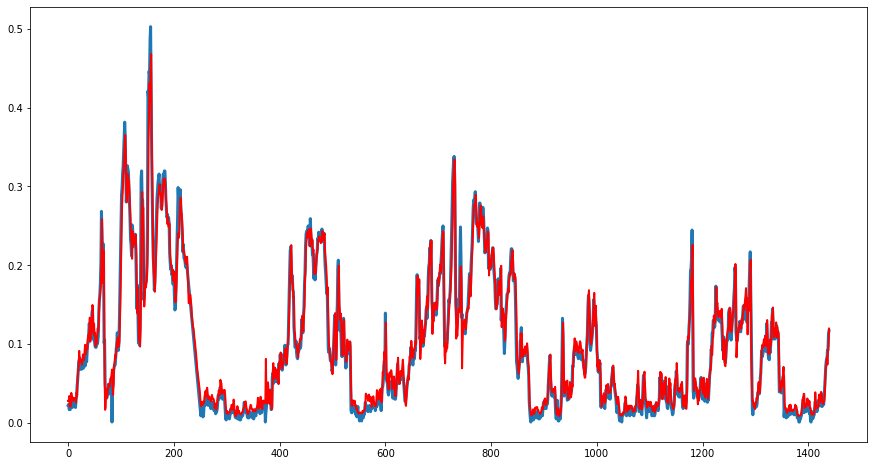

[14.244071600661414, 17.23752686100586, 13.055500685695211, 14.073840090507636, 12.787123419243375, 12.805741591974913, 17.218412947800196, 22.000660159342914, 14.97800829931702, 14.473937199893827, 13.324522866873124, 17.33069886360294, 14.677568940760032, 14.160477894487306, 15.007770700240323, 15.884503440894283, 13.600092052060551, 14.061860845426397, 18.889990470802676, 12.931655597577134, 11.260852893312975, 13.108754332511877, 12.804196588409585, 14.047451171888136]
14.956014256645712
/content/Wanshouxigongpreproc.csv
3.0
999.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 4.8178e-04 - val_loss: 1.9763e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 4.5975e-04 - val_loss: 1.7953e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 4.6424e-04 - val_loss: 1.7751e-04
Epoch 4/5
10470/10470

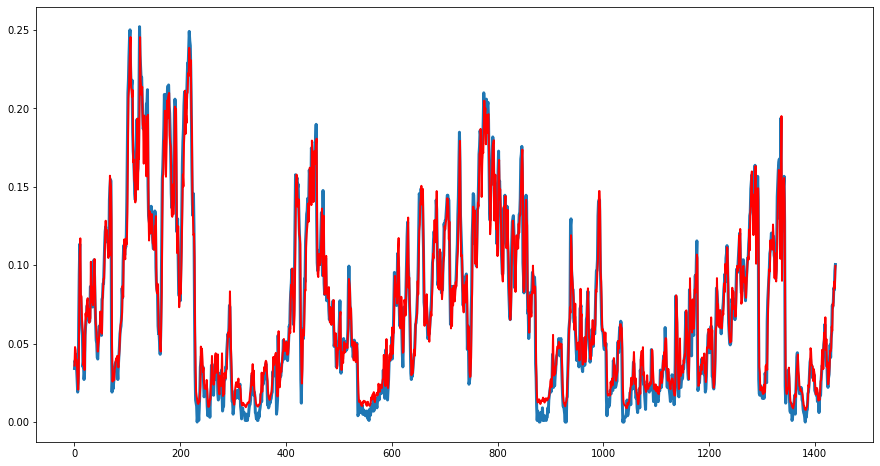

[14.005878668320221, 13.846272651457381, 19.7323190377419, 15.698263464428914, 14.899535488609407, 14.837198917126448, 14.720594889217908, 13.630249518604977, 17.126001484186755, 15.058732882631135, 13.765623585038053, 15.935676722279462, 14.339827332513913, 13.111881438110343, 17.370689461657626, 15.186204088112845, 15.914164255725165, 16.512001478651804, 14.214793267834459, 16.15456495311625, 13.697441567406727, 12.386228798240632, 19.687842085111118, 14.573554664964737]
15.398355732989742
/content/Shunyipreproc.csv
2.0
941.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 6.0113e-04 - val_loss: 3.2035e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.7889e-04 - val_loss: 3.0740e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.6241e-04 - val_loss: 3.1739e-04
Epoch 4/5
10470/10470 [=====

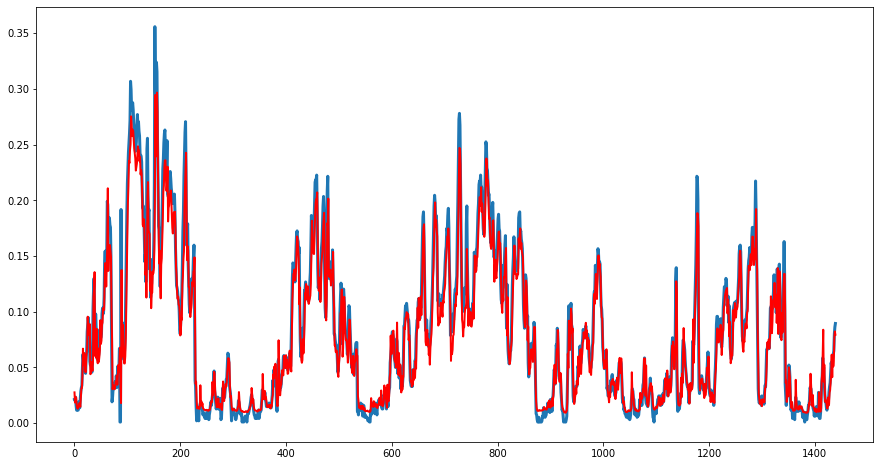

[18.272328439327055, 17.143860523757382, 17.498446590539835, 15.107777747701109, 18.12231109792505, 13.818558870097307, 13.545847968318613, 16.330963854344642, 24.426949780075347, 15.865140050325257, 15.741612868494128, 19.6232832398523, 13.93414680028618, 13.596293814602157, 18.117984570159713, 16.473721844873353, 29.07236044122287, 22.80300411067156, 15.664464153087145, 13.695558540980704, 12.400550568372202, 18.03256339783401, 18.23178719107991, 18.180199626841844]
17.76506564719761
/content/Guchengpreproc.csv
2.0
770.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 9.5033e-04 - val_loss: 5.7778e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 9.2946e-04 - val_loss: 6.1813e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 8.7066e-04 - val_loss: 5.3788e-04
Epoch 4/5
10470/10470 [==========

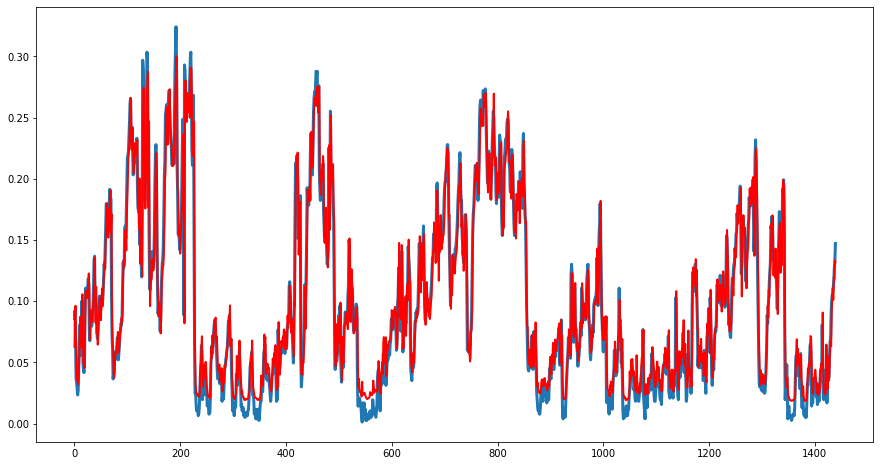

[12.593306110485997, 15.083239084154417, 17.326983187431637, 15.6025454703288, 15.315706080184007, 13.978102115677181, 13.358745040503058, 14.72743059952752, 14.88826050978927, 20.281146600321488, 16.568834951326885, 15.575120807197447, 15.060881482645051, 13.830797458705632, 15.216838036165283, 16.612595912564842, 25.929039493207746, 12.68983234841326, 11.642281670769863, 14.678471871220374, 15.24731080804027, 14.569828532032984, 16.668309275309753, 16.223445998349305]
15.847807149432022
/content/Tiantanpreproc.csv
3.0
821.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.6558e-04 - val_loss: 3.5678e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.3732e-04 - val_loss: 2.5501e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.1844e-04 - val_loss: 2.6236e-04
Epoch 4/5
10470/10470 [=======

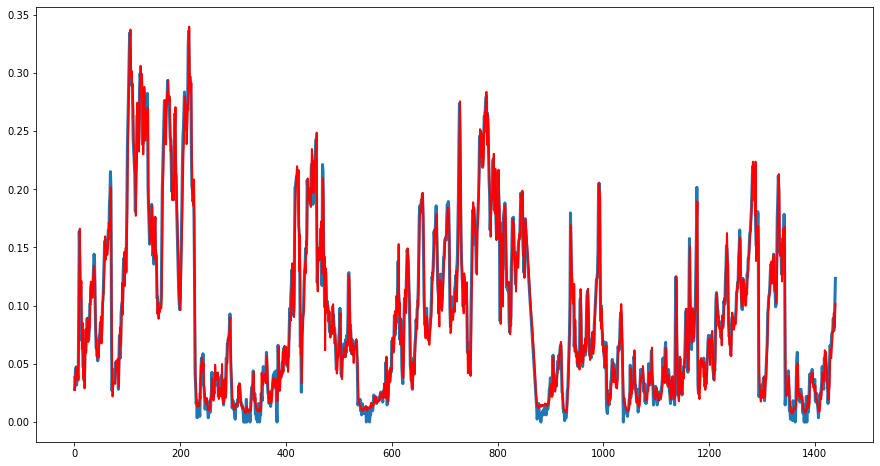

[15.961609972940783, 14.334311516257342, 20.18898972317876, 14.34093078015979, 13.653730216325982, 14.315332703187622, 13.437923091702645, 13.317487310973853, 18.15575142635149, 16.637085067144085, 16.677771631093876, 14.190881153721866, 17.27104166101134, 20.199469950621904, 16.201997740463362, 14.213767245721531, 15.912483889872414, 12.957292871759673, 15.798415456571915, 16.99169512423476, 13.554161392007725, 13.112633804544606, 22.333404031631584, 16.34469671027647]
16.063883767277314
/content/Dongsipreproc.csv
3.0
737.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 8.4767e-04 - val_loss: 3.3404e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 7.6867e-04 - val_loss: 3.2710e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 7.7871e-04 - val_loss: 3.5351e-04
Epoch 4/5
10470/10470 [========

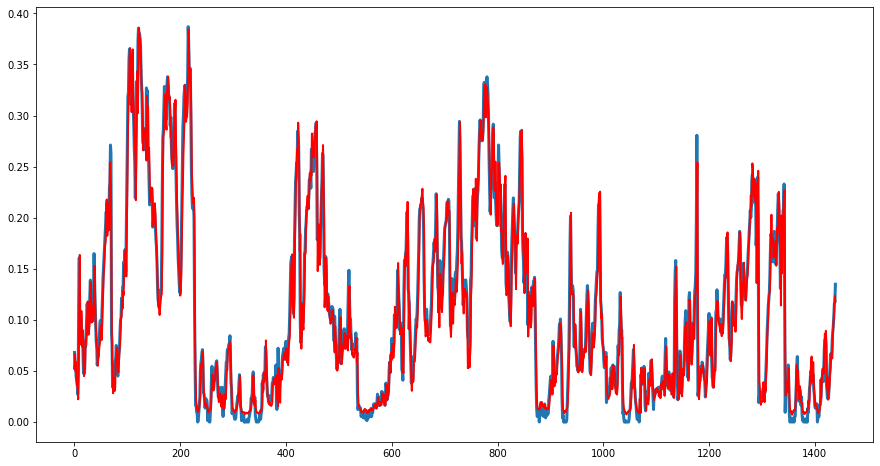

[18.671636661257516, 18.485458538789324, 18.922516639338635, 17.056031318252906, 15.644831031003772, 15.623053252194795, 14.133320076984367, 18.196937746900858, 15.641104048176507, 12.998024837260502, 18.283570865928784, 14.699766040197487, 14.377250266771282, 15.286444960793586, 14.40544241314536, 13.222519292691949, 17.52878080860831, 17.79285838406353, 14.533405090553748, 18.33202032175879, 13.884476090876813, 14.543826805375518, 21.24296678847465, 19.898854905420226]
16.57687231050505
/content/Wanliupreproc.csv
2.0
957.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.3438e-04 - val_loss: 2.7793e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.1374e-04 - val_loss: 2.8436e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 4.9825e-04 - val_loss: 2.3686e-04
Epoch 4/5
10470/10470 [========

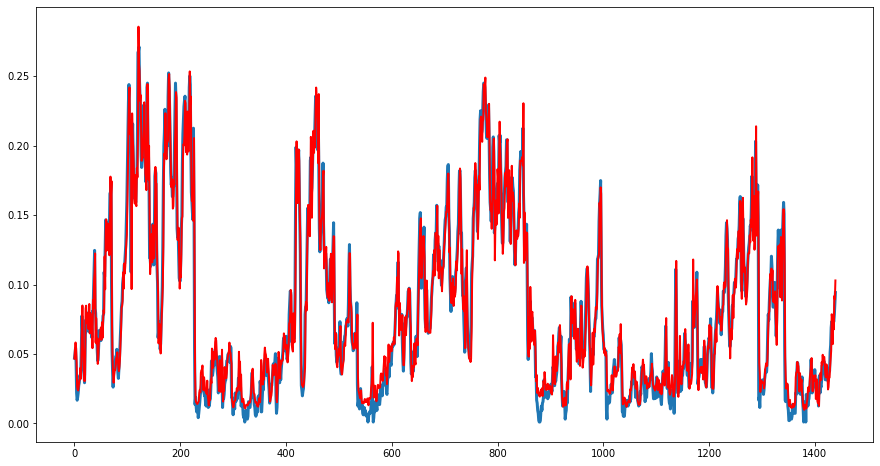

[14.800542006876322, 12.649145482466132, 13.960539662237066, 12.915863937197068, 13.360606654795951, 12.672051251714976, 12.807618247040686, 14.23205182820877, 14.312538356613997, 17.87687805528006, 16.884249960894966, 20.43316808451403, 22.44287918893334, 13.280545015040444, 14.13725835502277, 15.555225124605908, 14.567302622753955, 17.167196279878027, 13.286813488231813, 13.23716115442703, 11.270327218164116, 12.343397736137273, 20.830610958178518, 16.32470961020731]
15.361058302267587
/content/Aotizhongxinpreproc.csv
3.0
898.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.2956e-04 - val_loss: 5.2301e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.0723e-04 - val_loss: 5.3997e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 5.0203e-04 - val_loss: 5.3369e-04
Epoch 4/5
10470/10470 [===

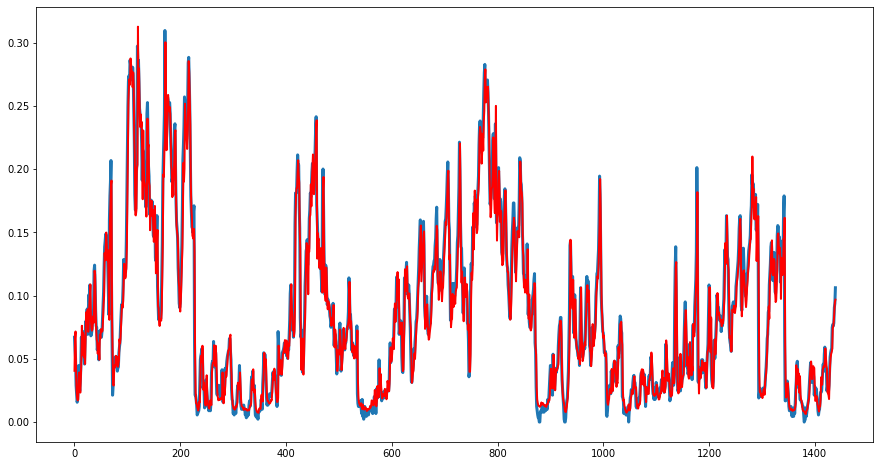

[15.923292444071667, 18.361666035997942, 16.69393313905836, 20.951108567964766, 14.964475062993563, 15.920525060672391, 12.909839207330318, 17.533320175805198, 13.285168698632985, 18.937504965402567, 13.71608233576778, 16.34970751478042, 13.713347083056153, 17.854836029303918, 12.405851391367857, 13.008976991221173, 15.530189175919173, 16.080557120010276, 16.211660493387058, 15.206496076272582, 12.338086031287162, 14.90605065980057, 20.425180111789025, 22.502817015668466]
16.344478581678672
/content/Nongzhanguanpreproc.csv
2.0
844.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 7.2494e-04 - val_loss: 2.3174e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 6.8690e-04 - val_loss: 2.0270e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 6.7124e-04 - val_loss: 2.9458e-04
Epoch 4/5
10470/10470 [

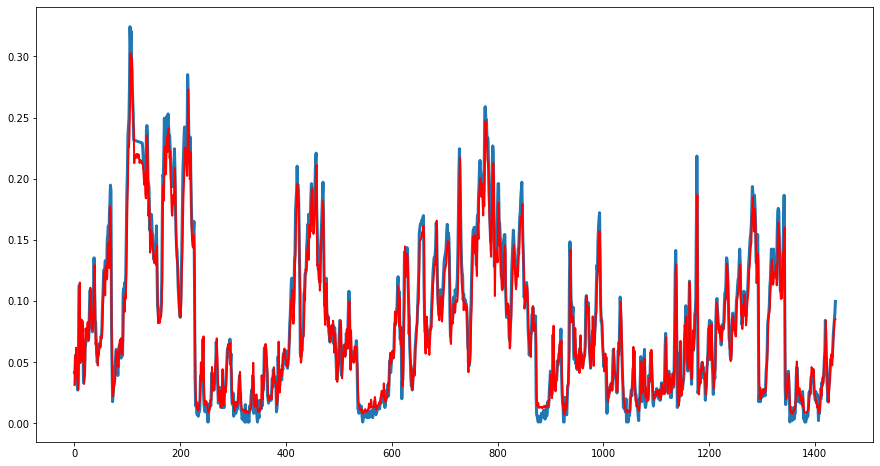

[14.62763042136748, 13.926062109903818, 13.61552751616566, 15.215974866431319, 12.986740169304074, 12.901300317611152, 11.888603528901177, 12.869533963417535, 16.25253241012873, 15.038116256973058, 14.573854428411016, 12.731925605898866, 13.250663365287258, 13.411967366233059, 11.898812301627059, 11.170805029408823, 12.564022826653408, 11.18612997582115, 12.832992445843164, 12.660753600665558, 12.350086174834807, 12.065781640797583, 16.419654889073335, 13.657409008632841]
13.42239601806047
/content/Guanyuanpreproc.csv
2.0
680.0
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Train on 10470 samples, validate on 1164 samples
Epoch 1/5
10470/10470 [==============================] - 17s 2ms/step - loss: 7.3507e-04 - val_loss: 4.1247e-04
Epoch 2/5
10470/10470 [==============================] - 17s 2ms/step - loss: 7.0770e-04 - val_loss: 7.8256e-04
Epoch 3/5
10470/10470 [==============================] - 17s 2ms/step - loss: 7.0327e-04 - val_loss: 4.1188e-04
Epoch 4/5
10470/10470 [=====

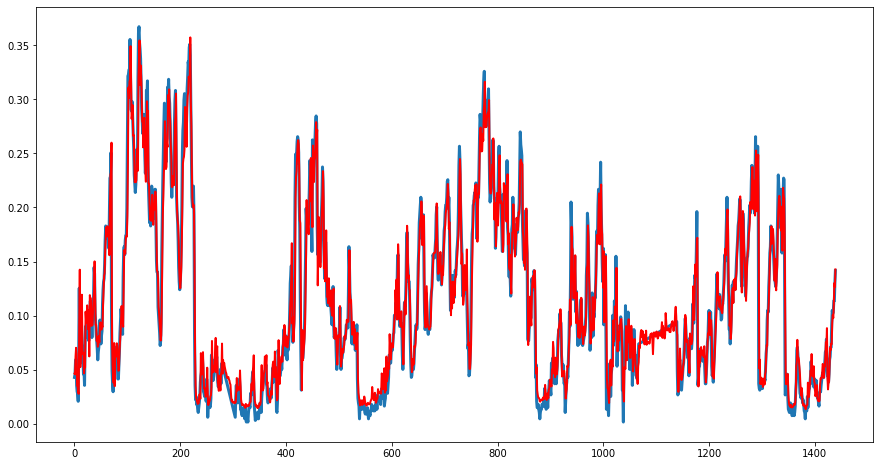

[15.309575376957847, 12.238471969582173, 14.892395325447707, 16.110585014677895, 13.366337969537707, 14.30653617772135, 13.088797105642202, 13.953100948849489, 12.647561496846864, 13.489271009002715, 17.646621848923374, 13.662751613539296, 12.429806289331518, 12.742453620480214, 12.448340849832585, 13.433400421600812, 15.335112066935212, 15.762428879912976, 15.059861857960842, 14.287546989924149, 13.111398612211337, 14.031976096832594, 24.14237191247757, 13.040590373988131]
14.67090261687754


In [0]:
if __name__ == '__main__':
  main()